# TF-IDF - Spacy

## The data

In [1]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Load the required libraries and set the display options

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# change the max width of pandas rows and columns to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Requirements for the exercices

Load the English spacy language

In [3]:
nlp = spacy.load('en')

Convert the list of strings to a list of spaCy documents to use later.

In [4]:
l_strings = [t0, t1, t2,t3,t4,t5,t6]
s_doc_list = [nlp(i) for i in l_strings]

Define the lemmatization function which removes the punctuations, spaces and stop words, 'US' and 'POS' but not "'s"

In [5]:
def lemmatize(doc):
    return [
        token.lemma_ for token in doc
        if not token.is_punct and not token.is_space
        and (token.text == "US" or not token.lower_ in STOP_WORDS )
        and not token.tag_ == "POS" or token.text == "'s"
    ]

## 1. Write a function tf that receives a string and a spaCy Doc and returns the number of times the word appears in the lemmatized Doc

In [6]:
def tf(s, doc):
    '''
    param 1: s = the string based on which you want to calculate the tf (term frequency)
    Note: s will be converted to lowercase for the calculation.
    param 2: doc = a spaCy doc over which you want to calculate the tf
    
    return the tf (term frequency) of the first parameter in the spaCy doc (second parameter)
    '''
    lem = lemmatize(doc)
    return lem.count(s.lower())


In [7]:
tf("horse", nlp(t6))

2

The word 'horse' occurs 2 times in t6.

## 2. Write a function idf that receives a string and a list of spaCy Docs and returns the inverse of the number of docs that contain the word

In [8]:
def idf(s, docs):
    '''
    param 1: s = the string based on which you want to calculate the IDF (inverse document frequency). 
    Note: s will be converted to lowercase for the calculation.
    param 2: docs = list of spaCy docs over which you want to calculate the IDF
    
    return the IDF (inverse document frequency) of the first parameter over all the docs (param 2)
    if s not in docs return 0.
    '''
    doc_counter = 0
    
    for doc in docs:
        if tf(s, doc) > 0:
            doc_counter += 1
    
    if doc_counter>0:
        return 1/doc_counter
    # if s not in docs return 0 to prevent dividing by 0
    else:
        return 0

In [9]:
idf('horse', s_doc_list)

1.0

The inverse docuemnt frequency of 'horse' is 1.

## 3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`. (Extra point if you check if the doc belongs to the docs.)

This function includes an extra check which checks if the document (second parameter) is in the list of spaCy documents (parameter 3) based on it's similarity else raise an error.

In [10]:
def tf_idf(s, doc, docs):
    '''
    param 1: s = the string based on which you want to calculate the the product of tf (term frequency) and idf (inverse document frequency)
    Note: s will be converted to lowercase for the calculation.
    param 2: doc = the spaCy doc over which the tf (term frequency) will be calculated.
    Note: doc (param 2) has to be in docs (param 3)
    param 3: docs = list of spaCy docs over which the idf (inverse document frequency) is calculted
    
    ValueError: when doc is not in docs
    
    return the prodcut of tf(s, doc) (term frequency) and idf(doc, docs) (inverse document frequency)
    '''
    
    sim = [doc.similarity(i) for i in docs]
    
    if 1.0 in sim:
        term_freq = tf(s, doc)
        inv_doc_freq = idf(s, docs)
        return term_freq * inv_doc_freq
    else:
        raise ValueError('The doc (argument 2) is not in the list of spaCy docs (argument 3))')
    

In [11]:
tf_idf('economy', nlp(t0), s_doc_list)

0.6666666666666666

The TF-IDF value of 'economy' is 0.666... in t0.

## 4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s

In [12]:
def all_lemmas(docs):
    '''
    param 1: docs = List of spaCy docs over where the lemmas will be calculated
    
    return a set of unique lemmatized words over all the docs passed in the first parameter.
    '''
    lemmas = set()
    for doc in docs:
        lemmas |= set(lemmatize(doc))
    return lemmas         

In [13]:
all_lemmas(s_doc_list)

{"'s",
 'abe',
 'abenomics',
 'accelerate',
 'ask',
 'be',
 'china',
 'confront',
 'corruption',
 'country',
 'cuba',
 'daily',
 'deer',
 'differ',
 'domestic',
 'ease',
 'economic',
 'economy',
 'endemic',
 'fall',
 'find',
 'fix',
 'future',
 'greatly',
 'grow',
 'hard',
 'heal',
 'horse',
 'hunt',
 'japan',
 'minister',
 'obama',
 'pace',
 'people',
 'politically',
 'prime',
 'problem',
 'putin',
 'rapid',
 'rid',
 'ruble',
 'russia',
 'russian',
 'sanction',
 'shinzo',
 'shirt',
 'strong',
 'thing',
 'tumble',
 'turmoil',
 'us',
 'value',
 'view',
 'violence',
 'vladimir',
 'work'}

## 5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents

In [14]:
def tf_idf_doc(doc, docs):
    '''
    param 1: doc = the spaCy doc over which the tf_idf will be calculated  
    param 2: docs = List of spaCy docs over where the tf_idf values will be calculated
    
    return a dictionary of {lemma: TF-IDF value} corresponding to each of the available documents
    '''
    lemmas = all_lemmas(docs)
    lemma_scores = {lemma : tf_idf(lemma, doc, docs) for lemma in lemmas}
    return lemma_scores

In [15]:
tf_idf_doc(nlp(t2), s_doc_list)

{'future': 0.5,
 'differ': 0.0,
 'horse': 0.0,
 'strong': 0.0,
 'putin': 0.0,
 'confront': 0.0,
 'be': 0.0,
 'abe': 0.5,
 'economy': 0.0,
 "'s": 0.5,
 'politically': 0.0,
 'hard': 0.0,
 'people': 1.0,
 'find': 0.0,
 'problem': 0.0,
 'deer': 0.0,
 'fix': 0.0,
 'fall': 0.0,
 'obama': 0.0,
 'turmoil': 1.0,
 'corruption': 0.0,
 'ease': 0.0,
 'daily': 0.0,
 'shinzo': 0.5,
 'economic': 1.0,
 'vladimir': 0.0,
 'hunt': 0.0,
 'accelerate': 0.0,
 'rid': 0.0,
 'us': 0.0,
 'tumble': 0.0,
 'endemic': 0.0,
 'violence': 0.0,
 'pace': 0.0,
 'russia': 0.0,
 'ask': 0.0,
 'rapid': 0.0,
 'china': 0.0,
 'view': 0.5,
 'abenomics': 0.0,
 'japan': 1.0,
 'thing': 0.0,
 'heal': 1.0,
 'ruble': 0.0,
 'russian': 0.0,
 'domestic': 0.0,
 'value': 0.0,
 'minister': 1.0,
 'greatly': 0.0,
 'shirt': 0.0,
 'sanction': 0.0,
 'prime': 1.0,
 'work': 0.5,
 'cuba': 0.0,
 'country': 1.0,
 'grow': 0.0}

## 6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.

In [16]:
def tf_idf_scores(docs):
    '''
    param 1: docs = the spaCy docs over which you want to calculate the tf idf scores
    
    return a DataFrame displaying the lemmas in the columns and the documents in the rows
    '''
    l = [tf_idf_doc(doc, docs) for doc in docs]
    df = pd.DataFrame(data=l, index=['t'+str(i) for i in range(len(docs))])
    return df
    

In [17]:
df = tf_idf_scores(s_doc_list)
df

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,cuba,daily,deer,differ,domestic,ease,economic,economy,endemic,fall,find,fix,future,greatly,grow,hard,heal,horse,hunt,japan,minister,obama,pace,people,politically,prime,problem,putin,rapid,rid,ruble,russia,russian,sanction,shinzo,shirt,strong,thing,tumble,turmoil,us,value,view,violence,vladimir,work
t0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
t1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
t2,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.5
t3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
t4,0.0,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
t5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
t6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 7. Visualize the TF-IDF

Normalize the data before displaying it in a heatmap. Calculation: (value - take the minimum value over the rows and columns) / (take the minimum over the rows and columns - maximum value over the rows and columns)

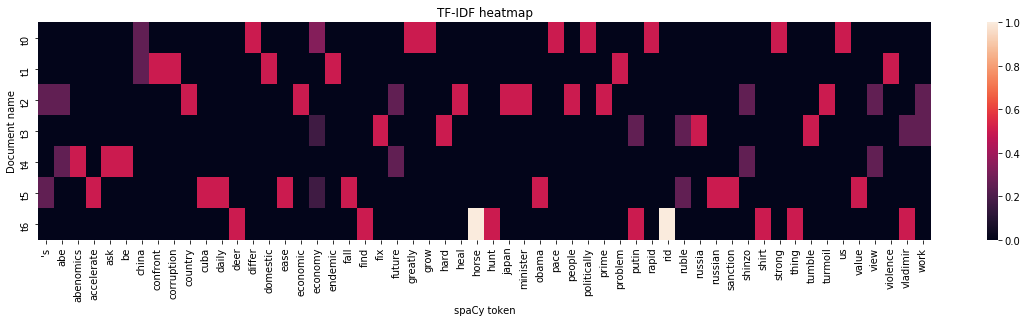

In [18]:
plt.figure(figsize=(20,4))
plt.title('TF-IDF heatmap')
df_norm = (df - df.min().min())/(df.max().max() - df.min().min())
sns.heatmap(df_norm)
plt.ylabel('Document name')
plt.xlabel('spaCy token')
plt.show()

The lighter the color the higher the TF-IDF value.